In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [7]:
dataFrame = pd.read_csv('data.csv')

In [15]:
yDiag = dataFrame.diagnosis
xFeats = dataFrame.drop(['Unnamed: 32', 'id', 'diagnosis'], axis = 1)

Now that I have the data in a usable state I will make sure that the data says what I expect it to so I will see the number of benign and malignant cancerous patients.

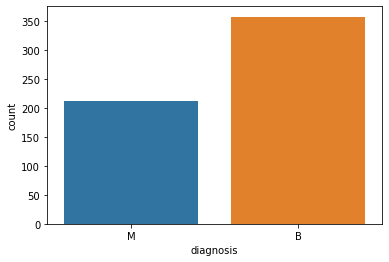

In [19]:
ax = sns.countplot(yDiag)

Thus we have an idea of what this dataset says. There are approximately double the number of patients with benign tumors than those with malignant tumors.

Now I will begin trying to visualize the data so that I can pick out some important features. Before doing this though I will look at the actually data to see if the data needs to be standardized or to see if it is fine as it is.

In [20]:
xFeats.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Actually I don't really think so - there are a lot of features though so one plot would make it hard to see all of them so I will split it up. I will standardize the data (I took this standardization code from the DATAI team in Turkey). I am choosing to use box plots here so we can see outliers.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

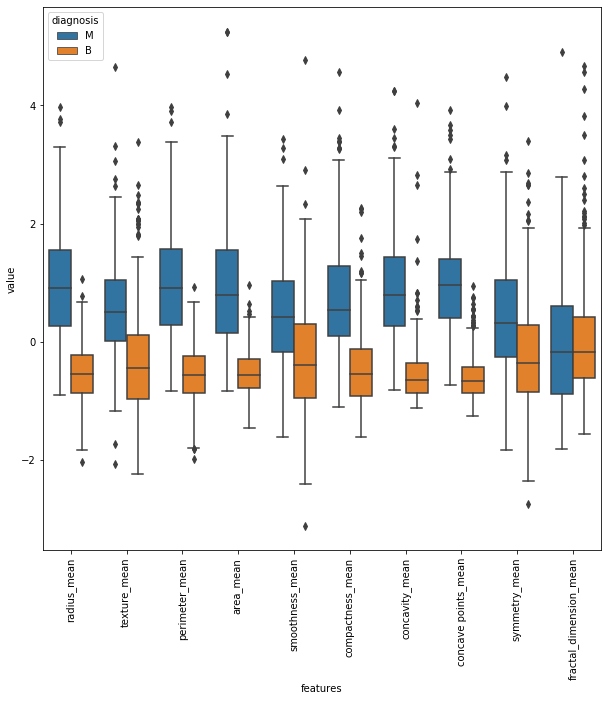

In [27]:
data = xFeats
#first 10 features
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([yDiag,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue = "diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

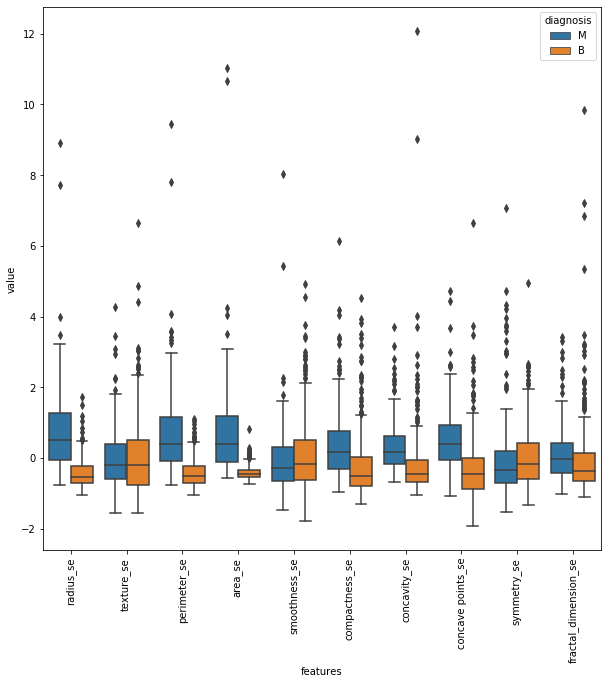

In [30]:
#next 10 features
data = pd.concat([yDiag,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue = "diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

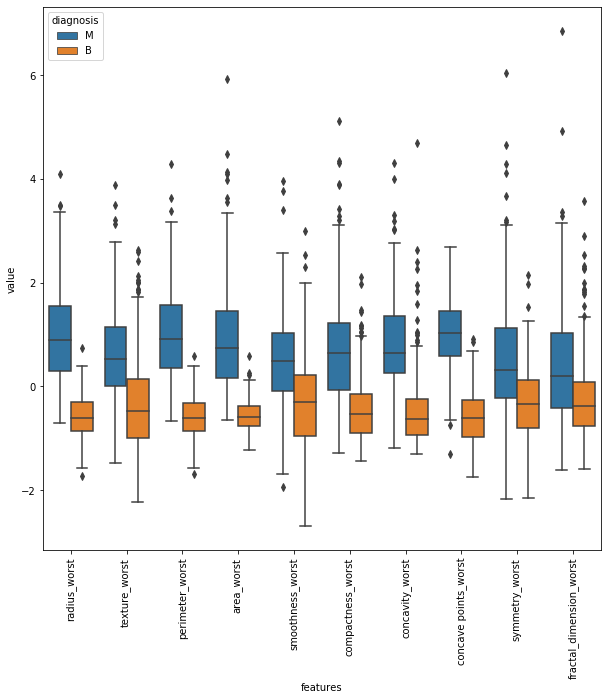

In [29]:
#last 10 features
data = pd.concat([yDiag,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue = "diagnosis", data=data)
plt.xticks(rotation=90)

To better see a correlation between certain features and certain classifications I read online that a good way to do this is through a swarm plot for each feature. I will lay out the swarm plots in the same way in which I laid out the box plots.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

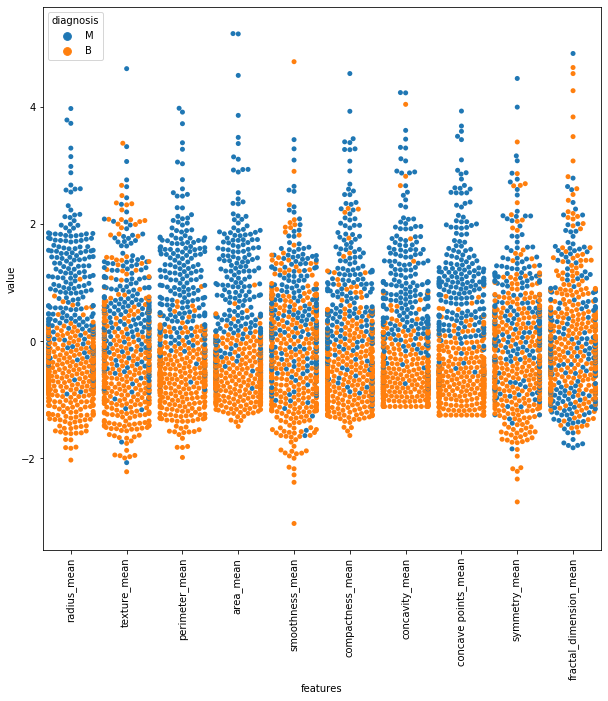

In [36]:
#first 10
data_d = yDiag
data = xFeats
data_n2 = (data - data.mean()) / (data.std())
data = pd.concat([yDiag,data_n2.iloc[:,0:10]],axis = 1)
data = pd.melt(data,id_vars = "diagnosis",
              var_name = "features",
              value_name = "value")
plt.figure(figsize=(10,10))
tick = time.time()
sns.swarmplot(x="features", y = "value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

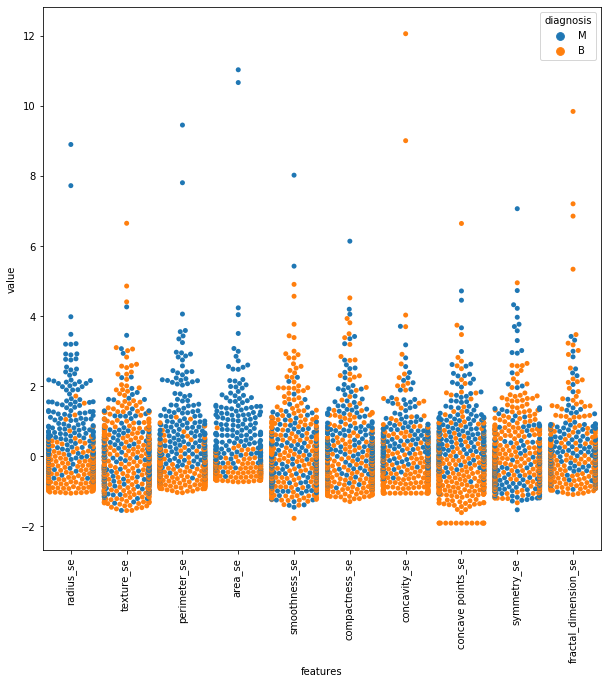

In [39]:
#next 10
data = pd.concat([yDiag,data_n2.iloc[:,10:20]],axis = 1)
data = pd.melt(data,id_vars = "diagnosis",
              var_name = "features",
              value_name = "value")
plt.figure(figsize=(10,10))
tick = time.time()
sns.swarmplot(x="features", y = "value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

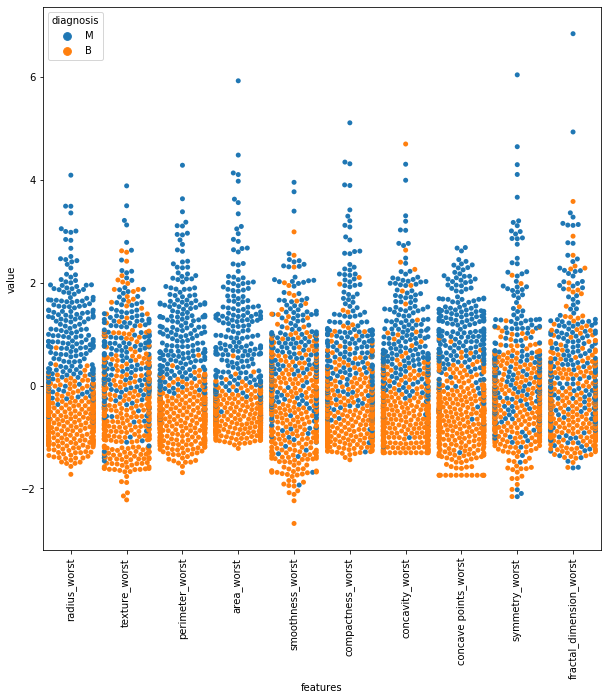

In [40]:
#last 10
data = pd.concat([yDiag,data_n2.iloc[:,20:31]],axis = 1)
data = pd.melt(data,id_vars = "diagnosis",
              var_name = "features",
              value_name = "value")
plt.figure(figsize=(10,10))
tick = time.time()
sns.swarmplot(x="features", y = "value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

I intially started to select features from the swarm plots based on the features that had the most clear difference between the malignant and benign classifications. I first picked out area_mean and perimeter_mean as both of them seemed to have a strong separation. After thinking about the data more though I was thinking that in reality those two features might be strongly correlated with eachother so there weouldn't be a strong point for me to use both of them in my analysis.

To try to solve this I will plot a Pearson Correlation matrix and try to pick out correlation between different features so I don't use correlated features in my model.

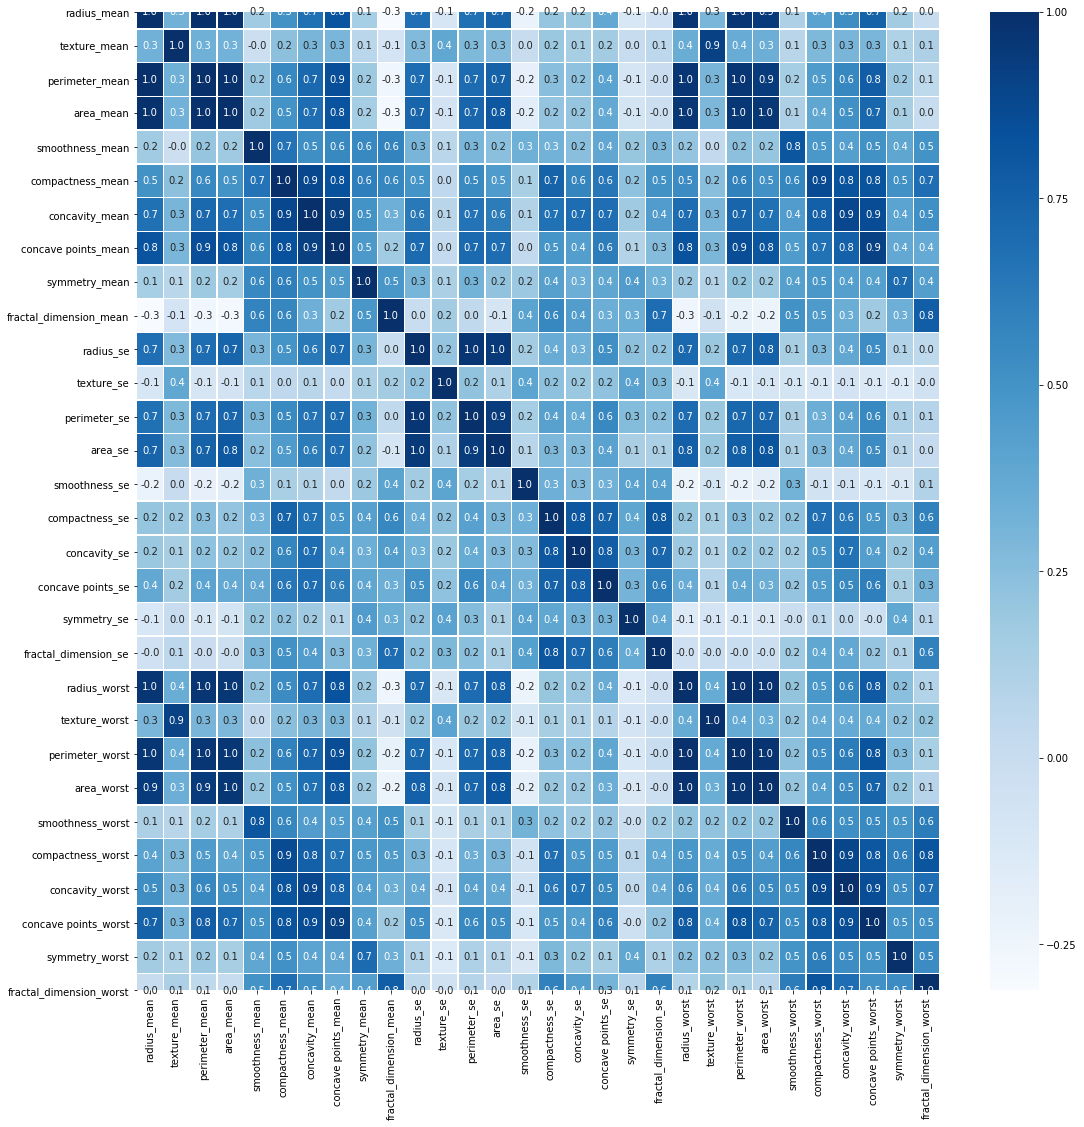

In [44]:
plt.figure(figsize=(18,18))
corr = xFeats.corr()
sns.heatmap(corr, annot=True, linewidths = .5, cmap=plt.cm.Blues, fmt = '.1f')
plt.show()

In [45]:
#now to select the highly correlated features
cor_target = abs(corr['area_mean'])

relevant_features = cor_target[cor_target>0.5]
relevant_features

radius_mean             0.987357
perimeter_mean          0.986507
area_mean               1.000000
concavity_mean          0.685983
concave points_mean     0.823269
radius_se               0.732562
perimeter_se            0.726628
area_se                 0.800086
radius_worst            0.962746
perimeter_worst         0.959120
area_worst              0.959213
concavity_worst         0.512606
concave points_worst    0.722017
Name: area_mean, dtype: float64

It looks like area_mean was in fact correlated with perimeter_mean but also radius_mean. I wil go through a few more tests like this to find some more correlations. I'll pick what features to check by looking at the swarm plots.

In [46]:
cor_target = abs(corr['concavity_mean'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

radius_mean                0.676764
perimeter_mean             0.716136
area_mean                  0.685983
smoothness_mean            0.521984
compactness_mean           0.883121
concavity_mean             1.000000
concave points_mean        0.921391
symmetry_mean              0.500667
radius_se                  0.631925
perimeter_se               0.660391
area_se                    0.617427
compactness_se             0.670279
concavity_se               0.691270
concave points_se          0.683260
radius_worst               0.688236
perimeter_worst            0.729565
area_worst                 0.675987
compactness_worst          0.754968
concavity_worst            0.884103
concave points_worst       0.861323
fractal_dimension_worst    0.514930
Name: concavity_mean, dtype: float64

The concavity_mean feature is correlated with the compactness_mean feature and the concave points_mean feature.

In [47]:
cor_target = abs(corr['radius_se'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

radius_mean             0.679090
perimeter_mean          0.691765
area_mean               0.732562
concavity_mean          0.631925
concave points_mean     0.698050
radius_se               1.000000
perimeter_se            0.972794
area_se                 0.951830
concave points_se       0.513346
radius_worst            0.715065
perimeter_worst         0.719684
area_worst              0.751548
concave points_worst    0.531062
Name: radius_se, dtype: float64

The radius_se feature is closely correlated with the perimeter_se feature and the area_se feature.

In [48]:
cor_target = abs(corr['radius_worst'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

radius_mean             0.969539
perimeter_mean          0.969476
area_mean               0.962746
compactness_mean        0.535315
concavity_mean          0.688236
concave points_mean     0.830318
radius_se               0.715065
perimeter_se            0.697201
area_se                 0.757373
radius_worst            1.000000
perimeter_worst         0.993708
area_worst              0.984015
concavity_worst         0.573975
concave points_worst    0.787424
Name: radius_worst, dtype: float64

The radius_worst feature is closely correlated with the features: perimeter_mean, perimeter_worst, and radius_mean. Going through this process is giving me a list of features that I can drop from the classifier.

In [49]:
cor_target = abs(corr['texture_mean'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

texture_mean     1.000000
texture_worst    0.912045
Name: texture_mean, dtype: float64

In [50]:
cor_target = abs(corr['area_worst'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

radius_mean             0.941082
perimeter_mean          0.941550
area_mean               0.959213
compactness_mean        0.509604
concavity_mean          0.675987
concave points_mean     0.809630
radius_se               0.751548
perimeter_se            0.730713
area_se                 0.811408
radius_worst            0.984015
perimeter_worst         0.977578
area_worst              1.000000
concavity_worst         0.543331
concave points_worst    0.747419
Name: area_worst, dtype: float64

Now I will remove the features that aren't valuable to the model because of strong correlations to ther other features in the data.

In [53]:
drops = ['perimeter_mean','radius_mean','compactness_mean', 'concave points_mean',
        'perimeter_se', 'area_se', 'perimeter_worst', 'texture_worst', 'area_worst',
        'compactness_se', 'concave points_se']
newXFeats = xFeats.drop(drops,axis=1)
newXFeats.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,25.38,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,24.99,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,23.57,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,14.91,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,22.54,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(newXFeats, yDiag, test_size=0.2)

cl = RandomForestClassifier()
cl = cl.fit(X_train, y_train)
accur = accuracy_score(y_test,cl.predict(X_test))
print(accur)

0.9736842105263158


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
